## CART (Classification and Regression Trees) Models

### Assignment
For today's assignment, you will create a Decision Tree Classifier for the dataset provided in the link below.

#### Requirements:

- Use the following dataset for your assignment today: [Link](https://drive.google.com/file/d/1p-0OicAm-AMFeCdaM9G53gai4Fqsqy1P/view)
- Create a Decision Tree Classifier model on your training data.
- Report your results on the test data.
- Report the precision, recall, and accuracy of your training and test sets.
- Try some of the preprocessing techniques learned last week where applicable to improve your model.
- Plot your Decision Tree at the end of your notebook showing the tree you created.
- Submit your notebook to the Learn platform when finished.

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn import tree

In [30]:
df = pd.read_csv('dog_horse.csv')

df.head()
df.shape

(200, 5)

In [3]:
# drop fitst column Unnamed: 0
df.drop(df.filter(regex="Unname"),axis=1, inplace=True)
df.head()

,height,weight,target,type
0,27.0,71.0,0.0,dog
1,27.0,92.0,0.0,dog
2,32.0,47.0,0.0,dog
3,30.0,90.0,0.0,dog
4,28.0,91.0,0.0,dog


In [4]:
# Create an new dataframe with initialized values 

numrows = 200 

decision_tree_df = pd.DataFrame({'target':[0.0]*numrows,
                             'type':['dog']*numrows})

decision_tree_df.head()

,target,type
0,0.0,dog
1,0.0,dog
2,0.0,dog
3,0.0,dog
4,0.0,dog


In [5]:
# Sort columns for convenience 
seq = ['target',
       'type']

# Create a simple 2 feature dataset to use for demo
decision_tree_df = decision_tree_df.reindex(columns=seq)

decision_tree_df.head()

,target,type
0,0.0,dog
1,0.0,dog
2,0.0,dog
3,0.0,dog
4,0.0,dog


In [6]:
# copy values from seattle weather to decision_tree_df

# Note: we are copying the precepetation values from seattle dataset

for i in range(0 , numrows):
    type = df.iloc[i,-1]
    target = df.iloc[(i-1),2]
    decision_tree_df.iat[i,1] = type
    decision_tree_df.iat[i,0] = target

decision_tree_df = decision_tree_df.dropna() #exclude any rows with missing data


In [7]:
# Note: the values for the first record is from the initialized state
decision_tree_df.head()

,target,type
0,1.0,dog
1,0.0,dog
2,0.0,dog
3,0.0,dog
4,0.0,dog


In [8]:
# Baseline 
decision_tree_df["type"].value_counts(normalize=True)

horse    0.5
dog      0.5
Name: type, dtype: float64

In [13]:
decision_tree_df["type"] = decision_tree_df["type"].replace('dog',0) 
decision_tree_df["type"] = decision_tree_df["type"].replace('horse',1)

In [14]:
# Modify the data to work with this model

x = decision_tree_df.target.values
y = decision_tree_df.type.values
x = x.reshape(decision_tree_df.shape[0], 1)

# Note: if you did not reshape your data this will result in a error in the classifier
# Note: we did not need to reshape the y values as we did with linear regression

x

array([[1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

#### Model Using Entropy

In [15]:
# Set max depth to 3 to make plotting the tree more visible

clf = DecisionTreeClassifier(criterion='entropy', max_depth=3).fit(x, y)

In [16]:
# we can calculate the accuarcy using score
score = clf.score(x,y)
print(score)

0.99


In [17]:
# calculate the acc, rec and pre 
acc = accuracy_score(x,y)
rec = recall_score(x,y)
pre = precision_score(x,y)

print(f'acc = {acc}, rec = {rec}, pre = {pre}')

acc = 0.99, rec = 0.99, pre = 0.99


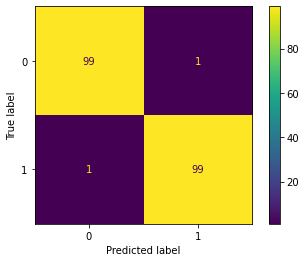

In [18]:
#we can also make a simple confusion matrix
plot_confusion_matrix(clf, x, y);

In [19]:
clf.classes_

array([0, 1])

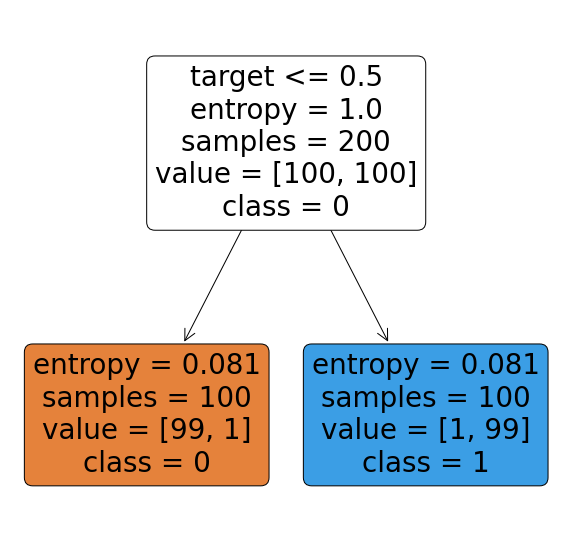

In [20]:
# Plot the tree
plt.figure(figsize=(10,10))

tree.plot_tree(
    clf, 
    filled=True,
    rounded=True,
    feature_names=["target"], # columns in same order as was trained on
    class_names=[str(x) for x in clf.classes_] # use cl2.classes_ to find class order
);

#### Model Using Gini

In [21]:
# Set max depth to 3 to make plotting the tree more visible
clf2 = DecisionTreeClassifier(criterion='gini', max_depth=3).fit(x, y)

In [22]:
#we can calculate the accuarcy using score
score = clf2.score(x,y)
print(score)

0.99


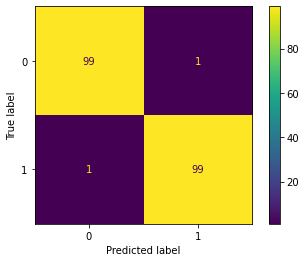

In [23]:
#we can also make a simple confusion matrix
plot_confusion_matrix(clf2, x, y);

In [24]:
[str(x) for x in clf2.classes_]

['0', '1']

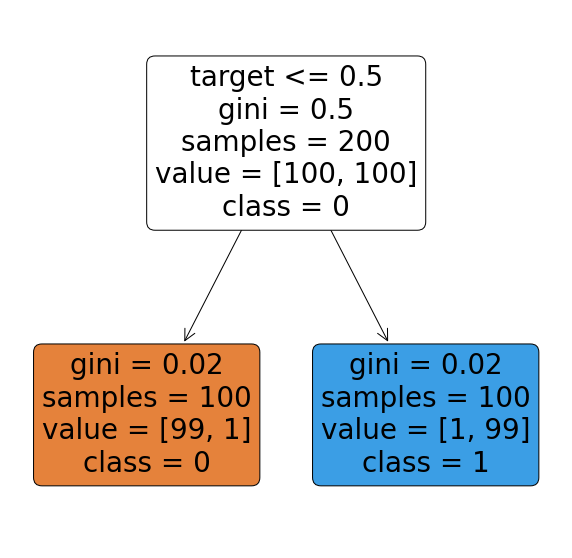

In [25]:
# Plot the tree
plt.figure(figsize=(10,10))
tree.plot_tree(
    clf2, 
    filled=True,
    rounded=True,
    feature_names=["target"], # columns in same order as was trained on
    class_names=[str(x) for x in clf2.classes_] # use cl2.classes_ to find class order
);

#### Not Setting Max Depth and Visualizing Tree

In [26]:
# Fully grown tree using Gini index as model criterion

clf3 = DecisionTreeClassifier(criterion='gini')

clf3.fit(x, y)


DecisionTreeClassifier()

In [27]:
#we can calculate the accuarcy using score
score = clf3.score(x,y)
print(score)

0.99


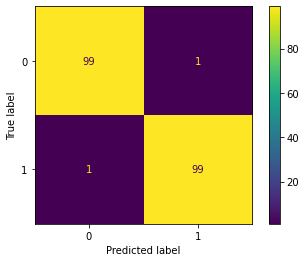

In [28]:
#we can also make a simple confusion matrix
plot_confusion_matrix(clf3, x, y);

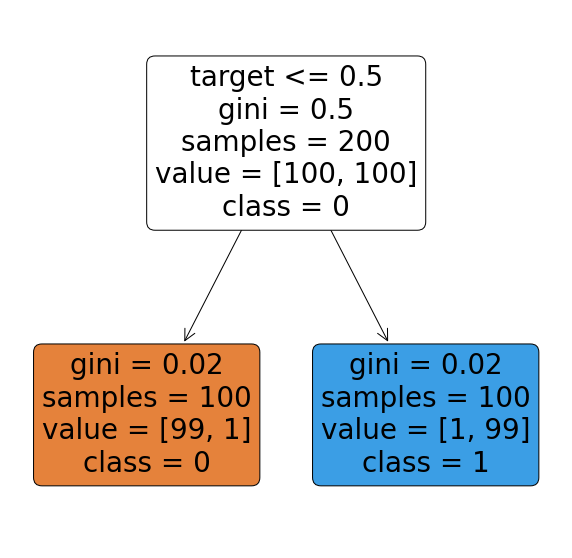

In [29]:
# Plot the tree
plt.figure(figsize=(10,10))
tree.plot_tree(
    clf3, 
    filled=True,
    rounded=True,
    feature_names=["target"], # columns in same order as was trained on
    class_names=[str(x) for x in clf3.classes_] # use cl2.classes_ to find class order
);